In [1]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv("data/heart.csv")

In [5]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [13]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [15]:
data.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [17]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

<Axes: xlabel='ChestPainType'>

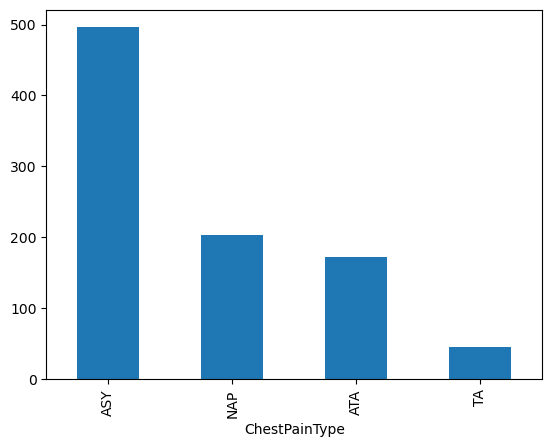

In [23]:
data.ChestPainType.value_counts().plot.bar()

<Axes: xlabel='RestingECG'>

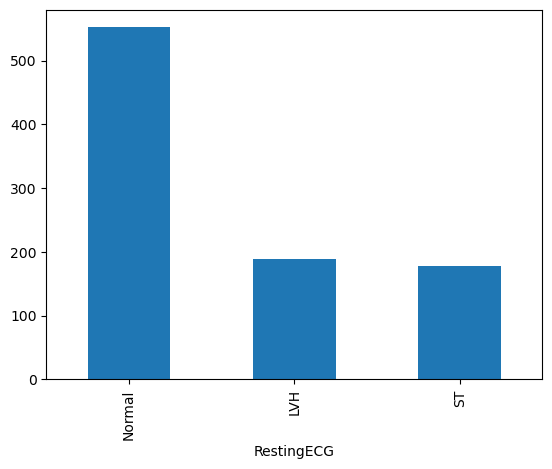

In [25]:
data.RestingECG.value_counts().plot.bar()

<Axes: xlabel='ExerciseAngina'>

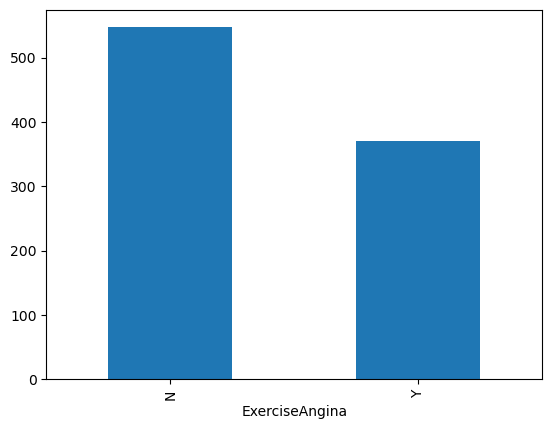

In [27]:
data.ExerciseAngina.value_counts().plot.bar()

<Axes: xlabel='ST_Slope'>

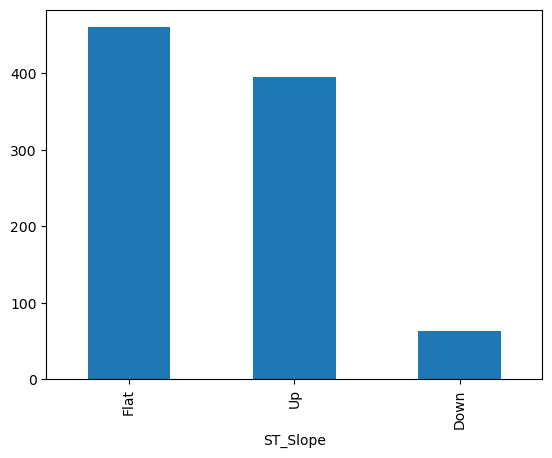

In [29]:
data.ST_Slope.value_counts().plot.bar()

In [31]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [33]:
data.shape

(918, 12)

In [37]:
data_num = data.select_dtypes(include=['number'])

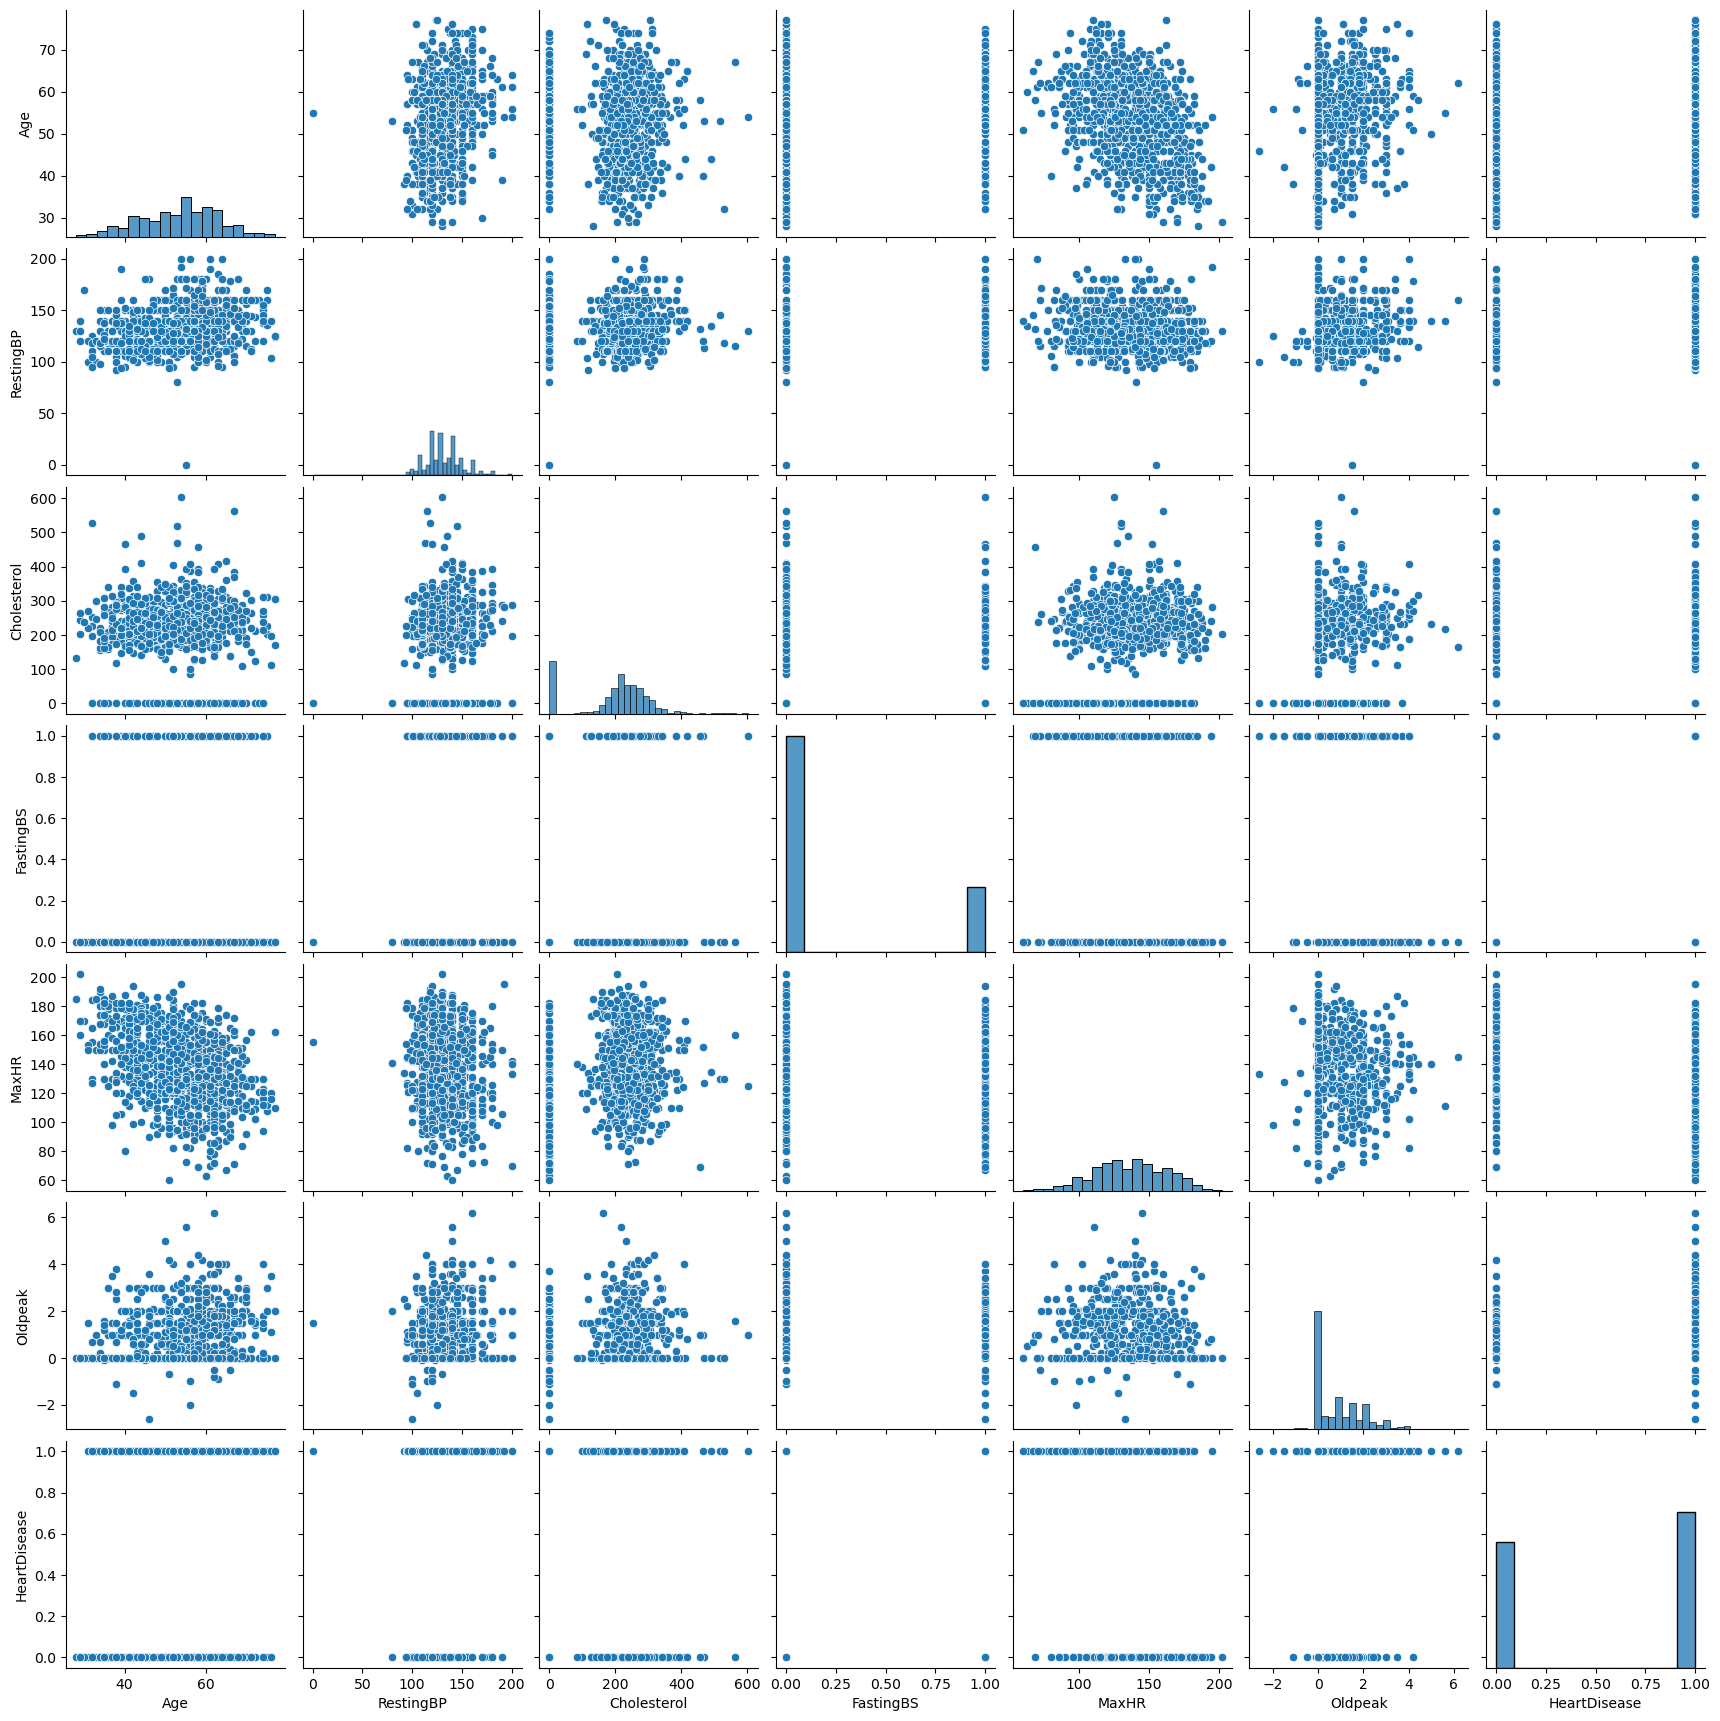

In [41]:
sns.pairplot(data_num)

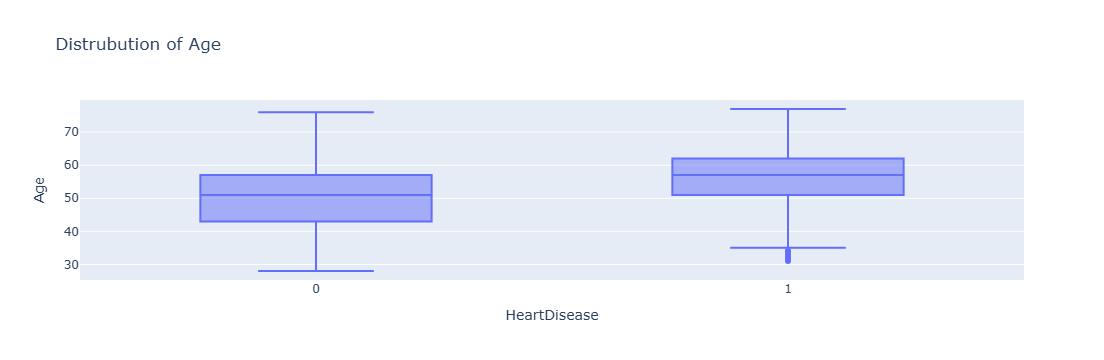

In [49]:
import plotly.express as px
fig = px.box(data_num,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

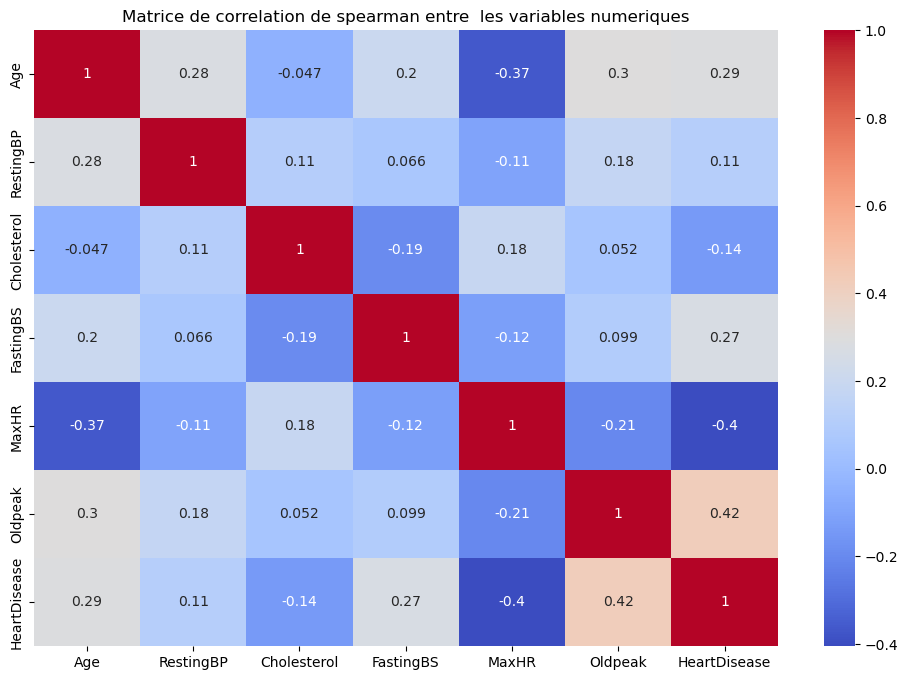

In [53]:
# matrice de coorelation entre les valeurs numeriques
#selection des variables numerique
num_vars = data.select_dtypes(include = np.number).columns
#calcule de la matrice de correlation de spearman
coor_matrix = data[num_vars].corr(method='spearman')

#Affichage de la matrice de correlation de spearman
plt.figure(figsize=(12,8))
sns.heatmap(coor_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de correlation de spearman entre  les variables numeriques')
plt.show()

In [62]:
#encodage 
from sklearn.preprocessing import OneHotEncoder

#selection des variebles categorielles
cat_vars = data.select_dtypes(include = ['object']).columns

#ENcodage binaire des variables categorielles
encoder = OneHotEncoder(sparse_output= False)
cat_data = pd.DataFrame(encoder.fit_transform(data[cat_vars]))
cat_data.columns = encoder.get_feature_names_out(cat_vars)

#remplacement des variables categorielles par les variables encodees
data = pd.concat([data.drop(cat_vars, axis=1), cat_data], axis=1)

In [64]:
data

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0      0.0    1.0                0.0  ...                0.0   
1      1.0    0.0                0.0  ...                1.0   
2      0.0    1.0                0.0  ...                0.0   
3      1.0    0.0                1.0  ...                0.0   
4      0.0    1.0                0.0  ...                1.0   
..     ...    ...                ...  ...                ...   
913    0.0    1.0                0.0  ...                0.0   
914    0.0    1.0                1.0  ...                0.0   
915    0.0    1.0                1.0  ...                0.0   
916    1.0    0.0                0.0  ...                0.0   
917    0.0    1.0                0.0  ...                1.0   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                 0.0             0.0                1.0            0.0   
1                 0.0             0.0                1.0            0.0   
2                 0.0             0.0                0.0            1.0   
3                 0.0             0.0                1.0            0.0   
4                 0.0             0.0                1.0            0.0   
..                ...             ...                ...            ...   
913               1.0             0.0                1.0            0.0   
914               0.0             0.0                1.0            0.0   
915               0.0             0.0                1.0            0.0   
916               0.0             1.0                0.0            0.0   
917               0.0             0.0                1.0            0.0   

     ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                 1.0               0.0            0.0            0.0   
1                 1.0               0.0            0.0            1.0   
2                 1.0               0.0            0.0            0.0   
3                 0.0               1.0            0.0            1.0   
4                 1.0               0.0            0.0            0.0   
..                ...               ...            ...            ...   
913               1.0               0.0            0.0            1.0   
914               1.0               0.0            0.0            1.0   
915               0.0               1.0            0.0            1.0   
916               1.0               0.0            0.0            1.0   
917               1.0               0.0            0.0            0.0   

     ST_Slope_Up  
0            1.0  
1            0.0  
2            1.0  
3            0.0  
4            1.0  
..           ...  
913          0.0  
914          0.0  
915          0.0  
916          0.0  
917          1.0  

[918 rows x 21 columns]

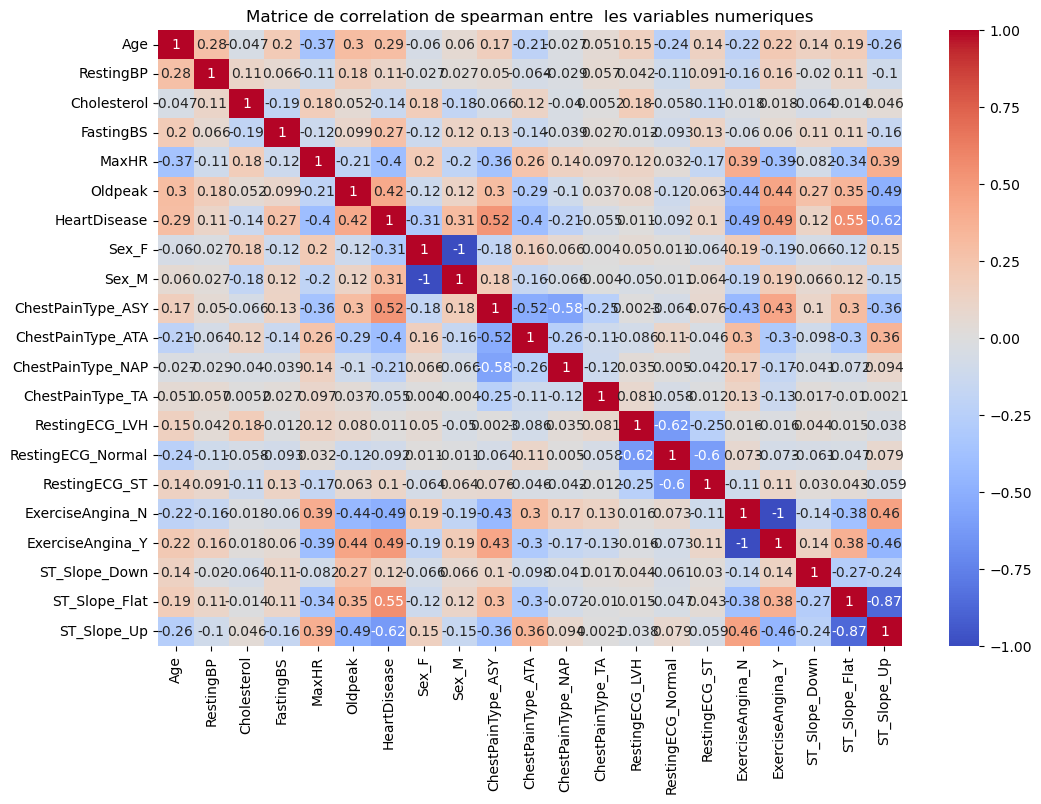

In [66]:
num_vars = data.select_dtypes(include = np.number).columns
#calcule de la matrice de correlation de spearman
coor_matrix = data[num_vars].corr(method='spearman')

#Affichage de la matrice de correlation de spearman
plt.figure(figsize=(12,8))
sns.heatmap(coor_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de correlation de spearman entre  les variables numeriques')
plt.show()

In [72]:
from sklearn.model_selection import train_test_split

X=  data.drop('HeartDisease', axis=1)
y = data.HeartDisease

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [78]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
model.score(X_train, y_train)

1.0

In [82]:
model.score(X_test, y_test)

0.7989130434782609

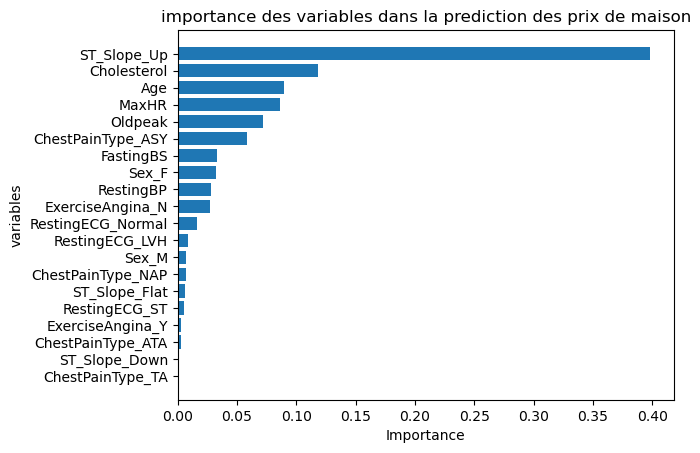

In [86]:
#Affichage de l'importance des variables 
importance = pd.Series(model.feature_importances_ ,index=X_train.columns)
importance_sorted = importance.sort_values()
plt.barh(importance_sorted.index, importance_sorted)
plt.title('importance des variables dans la prediction des prix de maison')
plt.xlabel('Importance')
plt.ylabel('variables')
plt.show()

In [92]:
#suppression des caracteristique a tres faible influence sur la target

In [90]:
X = X.drop(['ChestPainType_ATA','ST_Slope_Down', 'ChestPainType_TA'], axis=1)

Profondeur optimale : 3


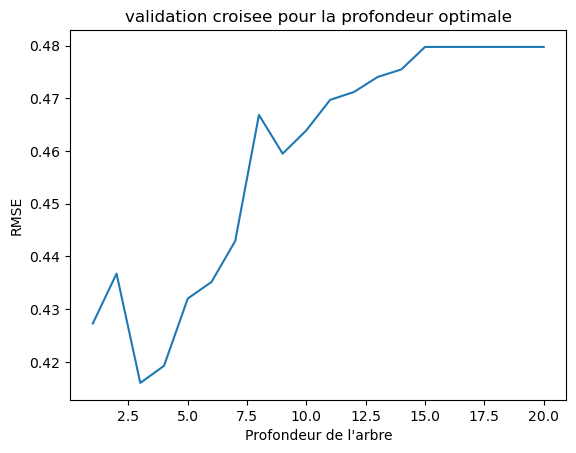

In [96]:
#recherche des meilleurs parametres pour notre model
from sklearn.model_selection import GridSearchCV

#definition de la grille de parametre 
param_grid = {'max_depth' : np.arange(1, 21)}

#Instanciation de l'estimateur de l'arbre de decision
tree = DecisionTreeClassifier(random_state=42)

#Instanciation de l'objet GridSearchCV
grid_tree = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

#entrainement de l'objet GridSearchCV
grid_tree.fit(X_train, y_train)

#Affichage de la profondeur optimale
print("Profondeur optimale :", grid_tree.best_params_['max_depth'])

#Affichage de la courbe de validation croisee pour la profondeur de l'arbre

plt.plot(param_grid['max_depth'], np.sqrt(-grid_tree.cv_results_['mean_test_score']))
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('RMSE')
plt.title("validation croisee pour la profondeur optimale")
plt.show()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
#Affichage d'un nouvel arbre avec la profondeur optimale
tree_optimal = DecisionTreeClassifier(max_depth = grid_tree.best_params_['max_depth'], random_state=42)
tree_optimal.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [104]:
tree_optimal.score(X_train, y_train)

0.8569482288828338

In [106]:
tree_optimal.score(X_test, y_test)

0.8478260869565217

In [108]:
pred = tree_optimal.predict(X_test)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



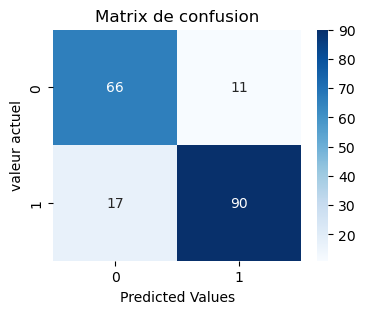

In [112]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Values')
plt.ylabel('valeur actuel')
plt.grid(False)
plt.title("Matrix de confusion")
plt.show()

In [116]:
import joblib 
# Sauvegarder le modèle
joblib.dump(model, 'Heart_disease_detection_logisticR.pkl')

['Heart_disease_detection_logisticR.pkl']